In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/j7/3qgnxg7x0mdgf8_bcqjqgyh80000gp/T/ipykernel_84114/839595825.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path,skiprows=7,delim_whitespace=True,


First time stamp is  287
Last time stamp is  162659216


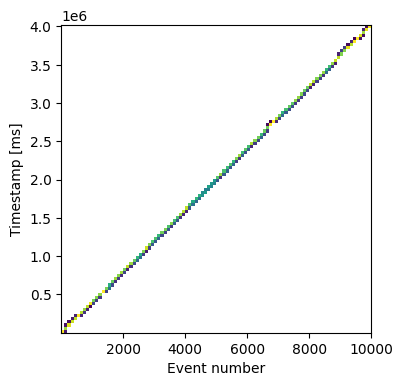

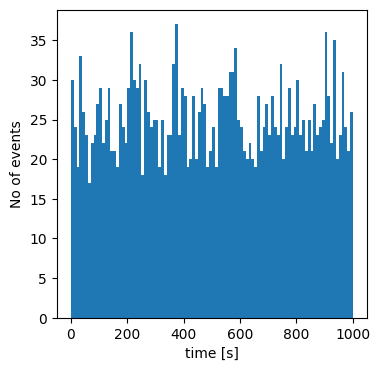

In [ ]:
data_path = "data/FileC015.txt"
df = pd.read_csv(data_path, skiprows=7, delim_whitespace=True, names=[
        'Event', 'Time', 'Date', 'TimeStamp', 'ADC1', 'ADC2', 'SiPM',
        'Temp', 'Pressure', 'DeadTime', 'Coincident', 'ID'
    ])
event = df["Event"].array
timestamp = df["TimeStamp"].array
print("First time stamp is ", timestamp[0])
print("Last time stamp is ",timestamp[-1])
plt.figure(figsize = (4,4))
counts, e1, e2, xxx = plt.hist2d(event[0:10000],timestamp[0:10000],bins=(100,100),cmin=0.1)
plt.ylabel("Timestamp [ms]")
plt.xlabel("Event number")
plt.show()
# make histogram with 100 10s bins
plt.figure(figsize = (4, 4))
counts, e2, xxx = plt.hist(timestamp / 1000, range=(0, 1000), bins=100)
plt.xlabel("time [s]")
plt.ylabel("No of events")
plt.show()

In [3]:
df.head(10)

,Event,Time,Date,TimeStamp,ADC1,ADC2,SiPM,Temp,Pressure,DeadTime,Coincident,ID
0,1,0:00:07,1/1/2019,287,141.0,7.0,7.76,30.82,101315.64,47968,0,ShirleyAnnJackson
1,2,0:00:07,1/1/2019,349,789.0,36.0,21.02,30.82,101315.64,5975,0,ShirleyAnnJackson
2,3,0:00:07,1/1/2019,679,960.0,184.0,43.80,30.82,101315.82,49804,0,ShirleyAnnJackson
3,4,0:00:07,1/1/2019,789,87.0,7.0,6.28,30.82,101315.82,1834,0,ShirleyAnnJackson
4,5,0:00:09,1/1/2019,2105,927.0,142.0,37.97,30.81,101316.94,49802,0,ShirleyAnnJackson
5,6,0:00:09,1/1/2019,2415,102.0,8.0,6.65,30.81,101316.94,1835,0,ShirleyAnnJackson
6,7,0:00:09,1/1/2019,2755,204.0,8.0,9.39,30.81,101317.23,49803,0,ShirleyAnnJackson
7,8,0:00:09,1/1/2019,2990,577.0,8.0,13.57,30.81,101317.23,3823,0,ShirleyAnnJackson
8,9,0:00:10,1/1/2019,2999,725.0,16.0,16.99,30.81,101317.23,1835,0,ShirleyAnnJackson
9,10,0:00:10,1/1/2019,3611,377.0,8.0,11.92,30.81,101317.32,49804,0,ShirleyAnnJackson


## 1. Measuring the mean
### (1) First 100 10-second bins

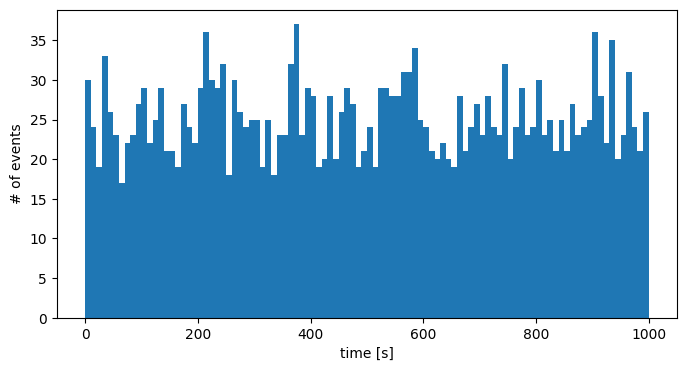

Counts in the first 100 10-second bins:  [30, 24, 19, 33, 26, 23, 17, 22, 23, 27, 29, 22, 25, 29, 21, 21, 19, 27, 24, 22, 29, 36, 30, 29, 32, 18, 30, 26, 24, 25, 25, 19, 25, 18, 23, 23, 32, 37, 23, 29, 28, 19, 20, 28, 20, 26, 29, 27, 19, 21, 24, 19, 29, 29, 28, 28, 31, 31, 34, 25, 24, 21, 20, 22, 20, 19, 28, 21, 24, 27, 23, 28, 24, 23, 32, 20, 24, 29, 23, 24, 30, 23, 25, 21, 25, 21, 27, 23, 24, 25, 36, 28, 22, 35, 20, 23, 31, 24, 21, 26]


In [ ]:
plt.figure(figsize=(8, 4))
counts, _, _ = plt.hist(timestamp / 1000, range=(0, 1000), bins=100)
plt.xlabel("time [s]")
plt.ylabel("# of events")
plt.show()
print("Counts in the first 100 10-second bins: ", list(counts.astype(int)))

### (2) Cumulative average for the 100 intervals

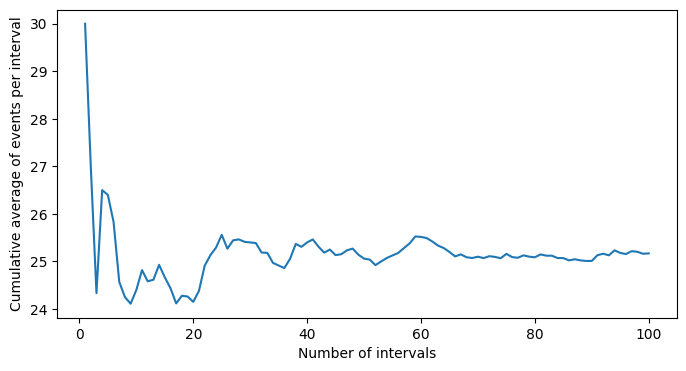

In [ ]:
cumulative_counts = np.cumsum(counts)
cumulative_avg = cumulative_counts / np.arange(1, 101)
plt.figure(figsize=(8, 4))
# plt.ylim(0, 30)
plt.plot(np.arange(1, 101), cumulative_avg)
plt.xlabel("Number of intervals")
plt.ylabel("Cumulative average of events per interval")
plt.show()

### (3) Error estimation
$$
\text{Var}(\mu_c(x_j)) = \frac{1}{j^2} \sum_{i=1}^j \text{Var}(x_i) = \frac{1}{j^2} \sum_{i=1}^j x_i = \frac{1}{j} \mu_c(x_j)
$$
Therefore the standard deviation of $\mu_c(x_j)$ is $\sqrt{\frac{1}{j} \mu_c(x_j)}$.

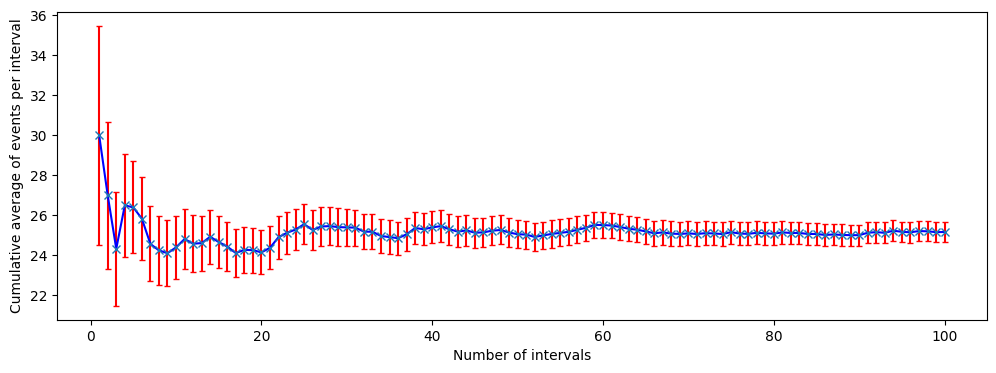

In [18]:
errors = np.sqrt(cumulative_counts) / np.arange(1, 101)
plt.figure(figsize=(12, 4))
plt.errorbar(np.arange(1, 101), cumulative_avg, yerr=errors, fmt='x', ecolor='red', capsize=2)
plt.plot(np.arange(1, 101), cumulative_avg, color='blue')
plt.xlabel("Number of intervals")
plt.ylabel("Cumulative average of events per interval")
plt.show()

### (4) A fresh set of 100 10-second bins

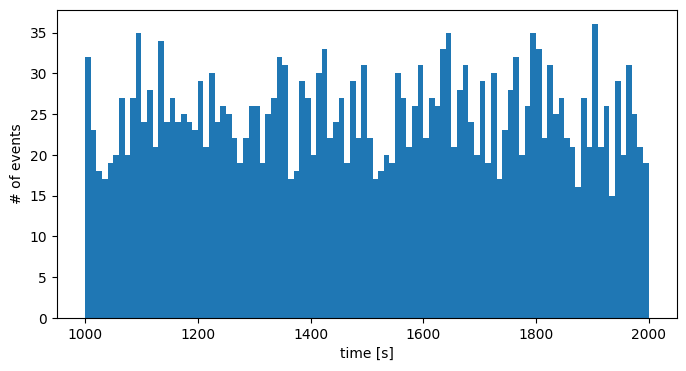

Counts in the second 100 10-second bins:  [30, 24, 19, 33, 26, 23, 17, 22, 23, 27, 29, 22, 25, 29, 21, 21, 19, 27, 24, 22, 29, 36, 30, 29, 32, 18, 30, 26, 24, 25, 25, 19, 25, 18, 23, 23, 32, 37, 23, 29, 28, 19, 20, 28, 20, 26, 29, 27, 19, 21, 24, 19, 29, 29, 28, 28, 31, 31, 34, 25, 24, 21, 20, 22, 20, 19, 28, 21, 24, 27, 23, 28, 24, 23, 32, 20, 24, 29, 23, 24, 30, 23, 25, 21, 25, 21, 27, 23, 24, 25, 36, 28, 22, 35, 20, 23, 31, 24, 21, 26]


In [19]:
plt.figure(figsize=(8, 4))
counts_2, _, _ = plt.hist(timestamp / 1000, range=(1000, 2000), bins=100)
plt.xlabel("time [s]")
plt.ylabel("# of events")
plt.show()
print("Counts in the second 100 10-second bins: ", list(counts.astype(int)))

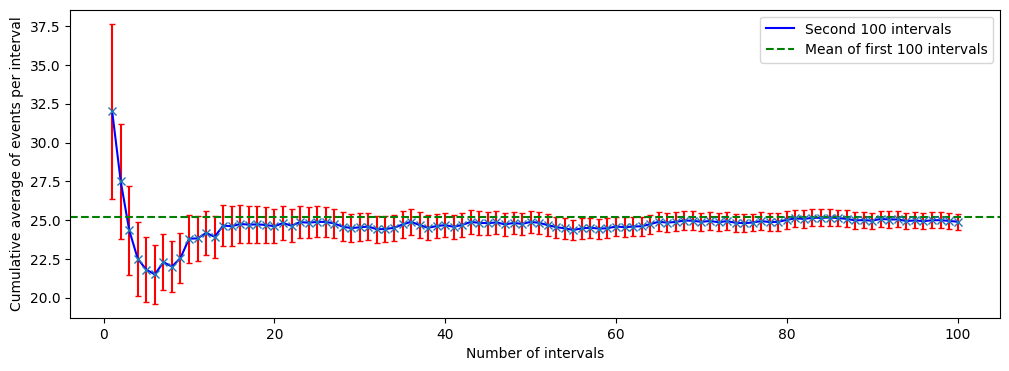

In [20]:
cumulative_counts_2 = np.cumsum(counts_2)
cumulative_avg_2 = cumulative_counts_2 / np.arange(1, 101)
# For reference, calculate the mean from the first set
mean_1 = cumulative_avg[-1]
plt.figure(figsize=(12, 4))
plt.errorbar(np.arange(1, 101), cumulative_avg_2, yerr=np.sqrt(cumulative_counts_2) / np.arange(1, 101), fmt='x', ecolor='red', capsize=2)
plt.plot(np.arange(1, 101), cumulative_avg_2, color='blue', label='Second 100 intervals')
plt.axhline(mean_1, color='green', linestyle='--', label='Mean of first 100 intervals')
plt.xlabel("Number of intervals")
plt.ylabel("Cumulative average of events per interval")
plt.legend()
plt.show()

$\chi^2$ test for the mean:
$$
\chi^2 = \sum_{i=1}^n \frac{(x_i - \mu)^2}{\sigma_i^2}
$$


In [27]:
# Do chi^2 test for the first 100 intervals
chi_square = np.sum((counts - mean_1) ** 2 / counts)
degrees_of_freedom = len(counts) - 1
print(f"\chi^2 / ndf = {chi_square:.2f} / {degrees_of_freedom}")

\chi^2 / ndf = 78.74 / 99


### (5) Just some extension: let's do 1000 10-second bins

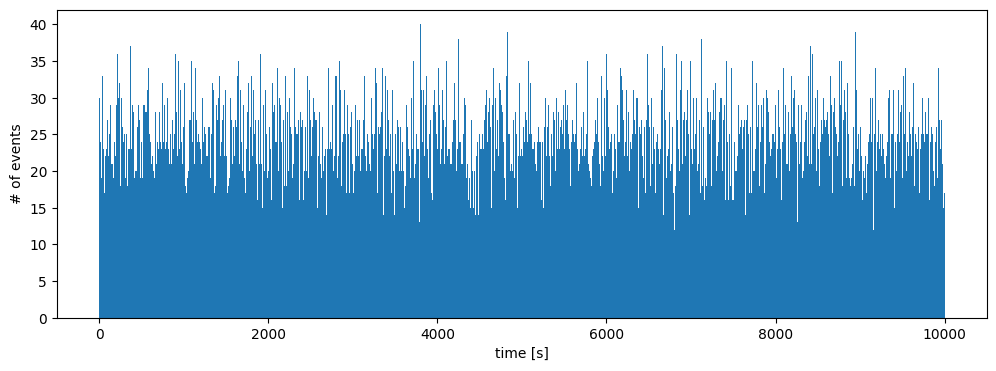

In [29]:
plt.figure(figsize=(12, 4))
counts_3, _, _ = plt.hist(timestamp / 1000, range=(0, 10000), bins=1000)
plt.xlabel("time [s]")
plt.ylabel("# of events")
plt.show()

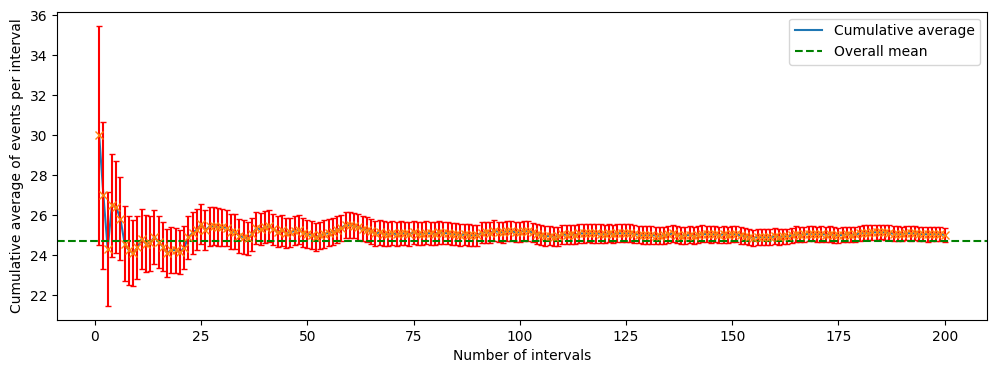

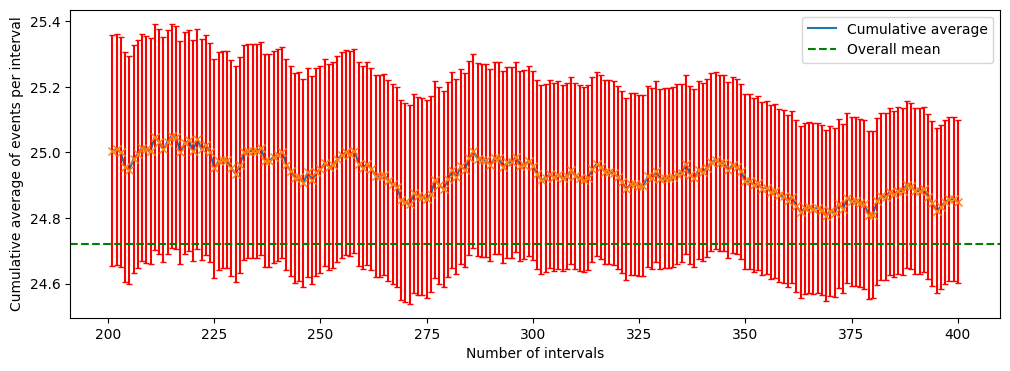

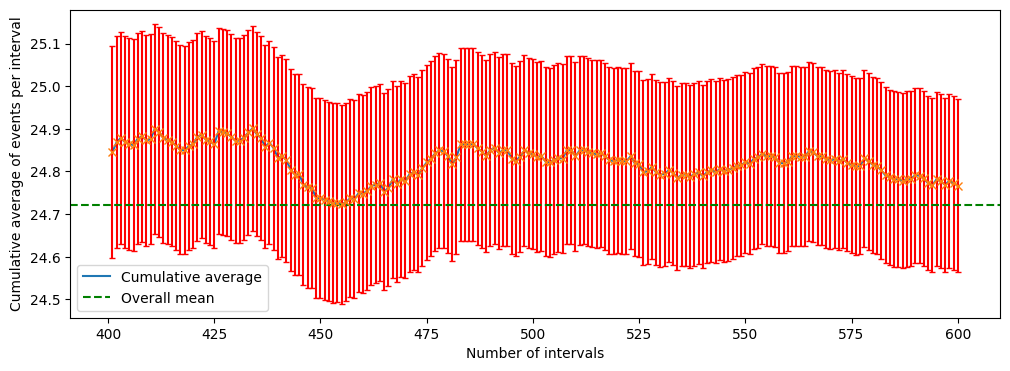

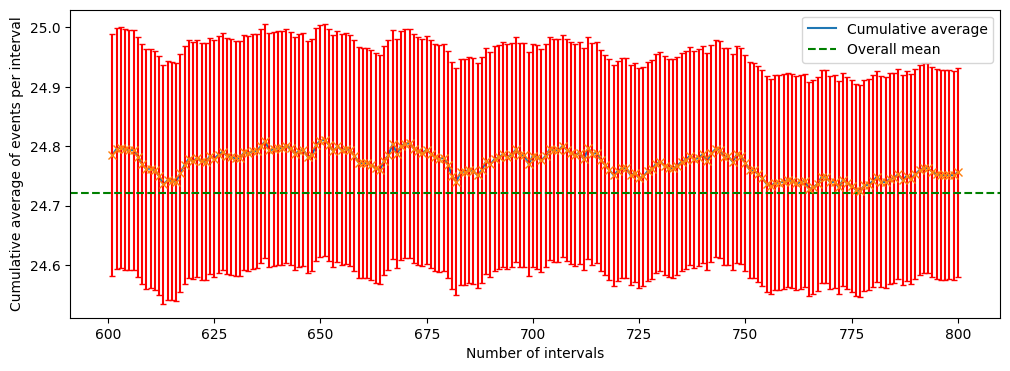

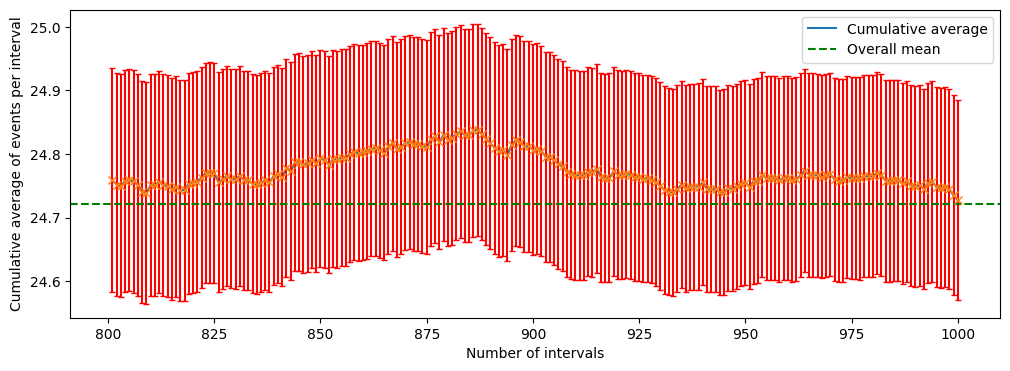

In [35]:
mean = np.mean(counts_3[1:])
cumulative_counts_3 = np.cumsum(counts_3)
cumulative_avg_3 = cumulative_counts_3 / np.arange(1, 1001)
for end in [200, 400, 600, 800, 1000]:
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(end - 199, end + 1), cumulative_avg_3[end - 200:end], label='Cumulative average')
    plt.errorbar(np.arange(end - 199, end + 1), cumulative_avg_3[end - 200:end], yerr=np.sqrt(cumulative_counts_3[end-200:end]) / np.arange(end - 199, end + 1), fmt='x', ecolor='red', capsize=2)
    plt.axhline(mean, color='green', linestyle='--', label='Overall mean')
    plt.xlabel("Number of intervals")
    plt.ylabel("Cumulative average of events per interval")
    plt.legend()
    plt.show()

In [34]:
# Do chi^2 test for the first 100 intervals
chi_square = np.sum((counts_3 - mean) ** 2 / counts_3)
degrees_of_freedom = len(counts_3) - 1
print(f"\chi^2 / ndf = {chi_square:.2f} / {degrees_of_freedom}")

\chi^2 / ndf = 1092.76 / 999


## 2. Poisson versus Gaussian
### (1) Frequency versus the Number of Counts

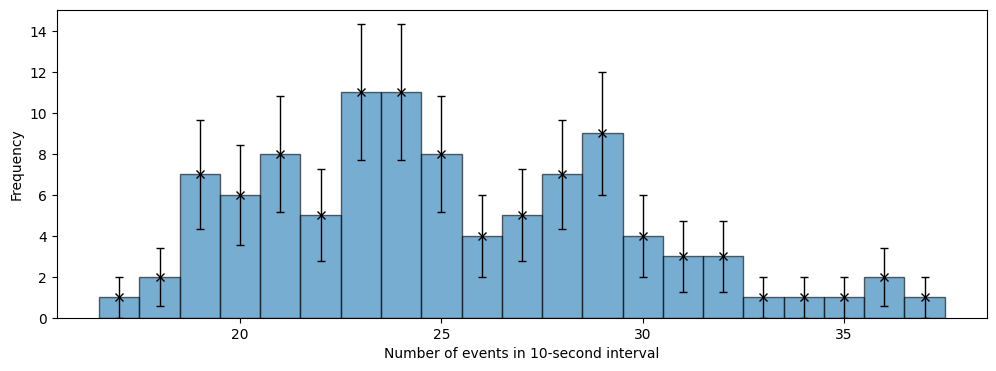

In [52]:
plt.figure(figsize=(12, 4))
n, bins, _ = plt.hist(counts, bins=np.arange(min(counts) - 0.5, max(counts) + 1.5, 1), alpha=0.6, color="C0", edgecolor="k")
centers = 0.5 * (bins[:-1] + bins[1:])
yerr = np.sqrt(n)  # Poisson error on counts per bin
plt.errorbar(centers, n, yerr=yerr, fmt="x", color="k", capsize=3, lw=1)
plt.xlabel("Number of events in 10-second interval")
plt.ylabel("Frequency")
plt.show()

### (2) Poisson Distribution Fit, from $\mu_c(100)$
The Poisson distribution is given by:
$$
P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$$
Here, since the mean count is $\mu_c(100)$, $\lambda = \mu_c(100)$.

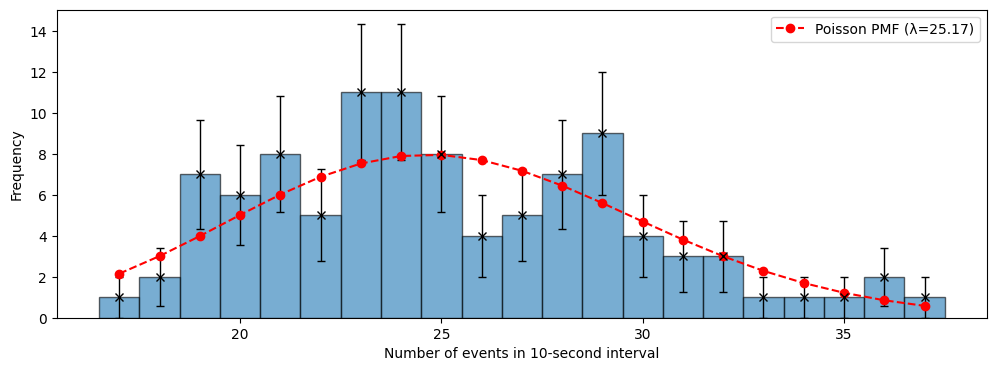

In [55]:
import math
def poisson_pmf(k, lam):
    return (lam ** k * np.exp(-lam)) / math.factorial(k)

lam = np.mean(counts)
k_values = np.arange(min(counts), max(counts) + 1).astype(int)
p_values = [poisson_pmf(k, lam) * 100 for k in k_values]

plt.figure(figsize=(12, 4))
n, bins, _ = plt.hist(counts, bins=np.arange(min(counts) - 0.5, max(counts) + 1.5, 1), alpha=0.6, color="C0", edgecolor="k")
centers = 0.5 * (bins[:-1] + bins[1:])
yerr = np.sqrt(n)  # Poisson error on counts per bin
plt.errorbar(centers, n, yerr=yerr, fmt="x", color="k", capsize=3, lw=1)
plt.plot(k_values, p_values, color="red", marker="o", linestyle="--", label=f"Poisson PMF (λ={lam:.2f})")
plt.xlabel("Number of events in 10-second interval")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [63]:
# chi^2 test for goodness of fit
expected_counts = [poisson_pmf(k, lam) * len(counts) for k in k_values]
chi_square = np.sum((n - expected_counts) ** 2 / expected_counts)
ndf = len(k_values) - 1

print(f"\chi^2 / ndf = {chi_square:.2f} / {ndf}")

from scipy.stats import chi2
p = 1 - chi2.cdf(chi_square, ndf)
print(f"p-value = {p:.4f}")

\chi^2 / ndf = 15.15 / 20
p-value = 0.7677


### (3) Gaussian Distribution Fit
When $\mu$ is large,
$$
\lim_{\mu \to \infty} P(k; \mu) = \frac{1}{\sqrt{2\pi \mu}} e^{-\frac{(k - \mu)^2}{2\mu}}
$$

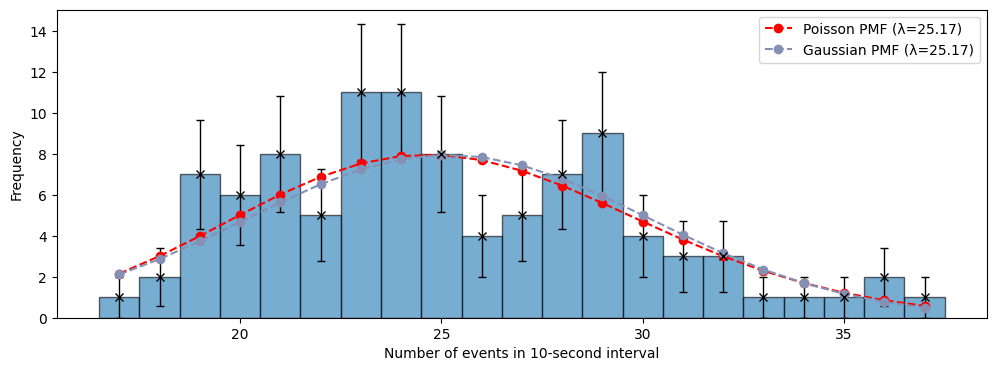

In [ ]:
def gaussian_pmf(k, mu):
    return (1 / (np.sqrt(2 * np.pi * mu))) * np.exp(-0.5 * ((k - mu) ** 2) / mu)

gaussian_values = [gaussian_pmf(k, lam) for k in k_values]

plt.figure(figsize=(12, 4))
n, bins, _ = plt.hist(counts, bins=np.arange(min(counts) - 0.5, max(counts) + 1.5, 1), alpha=0.6, color="C0", edgecolor="k")
centers = 0.5 * (bins[:-1] + bins[1:])
yerr = np.sqrt(n)  # Poisson error on counts per bin
plt.errorbar(centers, n, yerr=yerr, fmt="x", color="k", capsize=3, lw=1)
plt.plot(k_values, p_values, color="red", marker="o", linestyle="--", label=f"Poisson PMF (λ={lam:.2f})")
plt.plot(k_values, gaussian_values, color="#8491B4", marker="o", linestyle="--", label=f"Gaussian PMF (λ={lam:.2f})")
plt.xlabel("Number of events in 10-second interval")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [65]:
# again, chi^2 test for goodness of fit
expected_counts = [gaussian_pmf(k, lam) for k in k_values]
chi_square = np.sum((n - expected_counts) ** 2 / expected_counts)
ndf = len(k_values) - 1

print(f"\chi^2 / ndf = {chi_square:.2f} / {ndf}")

p = 1 - chi2.cdf(chi_square, ndf)
print(f"p-value = {p:.4f}")

\chi^2 / ndf = 17.05 / 20
p-value = 0.6500


$\chi^2$ test for the Poisson/Gaussian fit:

- Poisson: $\chi^2\ / \text{ndf} = 15.15 / 20$, $p=0.7677$
- Gaussian: $\chi^2\ / \text{ndf} = 17.05 / 20$, $p=0.6500$

### (4) Same Process, But with 100 100-Second Bins

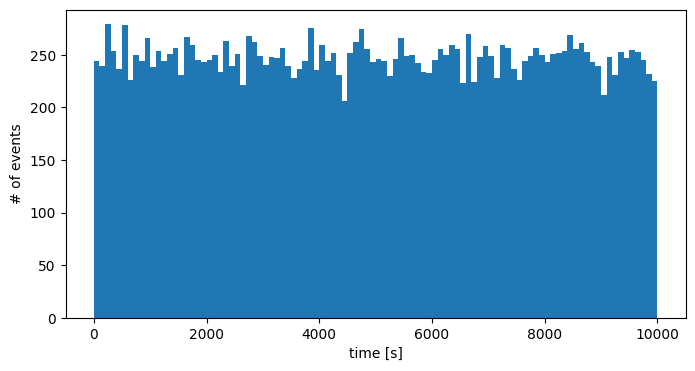

Counts in the first 100 100-second bins:  [244, 239, 279, 254, 237, 278, 226, 250, 244, 266, 238, 254, 244, 251, 257, 231, 267, 259, 245, 243, 245, 250, 234, 263, 239, 251, 221, 268, 262, 249, 240, 248, 247, 257, 239, 228, 237, 244, 276, 236, 259, 244, 252, 231, 206, 252, 262, 275, 256, 243, 246, 244, 230, 246, 266, 249, 250, 242, 234, 233, 245, 256, 250, 259, 256, 223, 270, 224, 248, 258, 249, 228, 259, 257, 237, 226, 244, 249, 257, 250, 243, 251, 252, 254, 269, 256, 261, 253, 243, 239, 212, 248, 231, 253, 247, 255, 253, 245, 232, 225]


In [66]:
plt.figure(figsize=(8, 4))
counts, _, _ = plt.hist(timestamp / 1000, range=(0, 10000), bins=100)
plt.xlabel("time [s]")
plt.ylabel("# of events")
plt.show()
print("Counts in the first 100 100-second bins: ", list(counts.astype(int)))

In [71]:
mean_new = np.mean(counts)
mean_new, min(counts), max(counts)

(247.27, 206.0, 279.0)

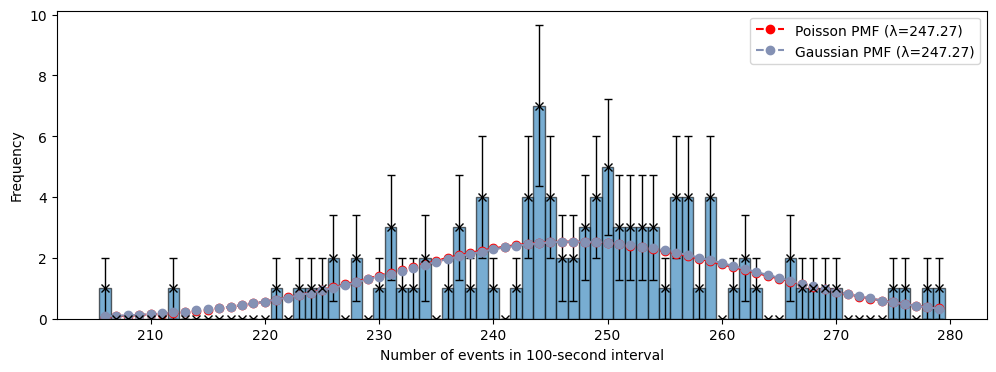

In [76]:
def poisson_pmf(k, lam):
    try:
        from scipy.stats import poisson
        return poisson.pmf(k, lam)
    except ImportError:
        return (lam ** k * np.exp(-lam)) / math.factorial(k)

def gaussian_pmf(k, mu, bin_width):
    try:
        from scipy.stats import norm
        return norm.pdf(k, loc=mu, scale=np.sqrt(mu)) * bin_width
    except ImportError:
        return (1 / (np.sqrt(2 * np.pi * mu))) * np.exp(-0.5 * ((k - mu) ** 2) / mu) * bin_width

k_values_new = np.arange(int(min(counts)), int(max(counts)) + 1)
poisson_values_new = [poisson_pmf(k, mean_new) * len(counts) for k in k_values_new]
gaussian_values_new = [gaussian_pmf(k, mean_new, bin_width=10000/100) for k in k_values_new]

plt.figure(figsize=(12, 4))
n, bins, _ = plt.hist(counts, bins=np.arange(min(counts) - 0.5, max(counts) + 1.5, 1), alpha=0.6, color="C0", edgecolor="k")
centers = 0.5 * (bins[:-1] + bins[1:])
yerr = np.sqrt(n)  # Poisson error on counts per bin
plt.errorbar(centers, n, yerr=yerr, fmt="x", color="k", capsize=3, lw=1)
plt.plot(k_values_new, poisson_values_new, color="red", marker="o", linestyle="--", label=f"Poisson PMF (λ={mean_new:.2f})")
plt.plot(k_values_new, gaussian_values_new, color="#8491B4", marker="o", linestyle="--", label=f"Gaussian PMF (λ={mean_new:.2f})")
plt.xlabel("Number of events in 100-second interval")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [77]:
chi_square_poisson = np.sum((n - poisson_values_new) ** 2 / poisson_values_new)
chi_square_gaussian = np.sum((n - gaussian_values_new) ** 2 / gaussian_values_new)
ndf = len(k_values_new) - 1
print(f"Poisson fit: \chi^2 / ndf = {chi_square_poisson:.2f} / {ndf}")
print(f"Gaussian fit: \chi^2 / ndf = {chi_square_gaussian:.2f} / {ndf}")

Poisson fit: \chi^2 / ndf = 68.09 / 73
Gaussian fit: \chi^2 / ndf = 66.43 / 73
